# 树叶分分类

## 数据集
总共18353张图片，176类，图片.jpg格式,三通道。

In [1]:
import os
import pandas as pd
import sys
import torch
from torchvision import transforms
from torch.utils.data import DataLoader

cur_dir = os.getcwd()
sys.path.append(os.path.dirname(cur_dir))

train_data = pd.read_csv('./../../DataSets/classify-leaves/train.csv')
data_dir = './../../DataSets/classify-leaves/'

train_data.head(),train_data.describe()


(          image             label
 0  images/0.jpg  maclura_pomifera
 1  images/1.jpg  maclura_pomifera
 2  images/2.jpg  maclura_pomifera
 3  images/3.jpg  maclura_pomifera
 4  images/4.jpg  maclura_pomifera,
                    image             label
 count              18353             18353
 unique             18353               176
 top     images/14545.jpg  maclura_pomifera
 freq                   1               353)

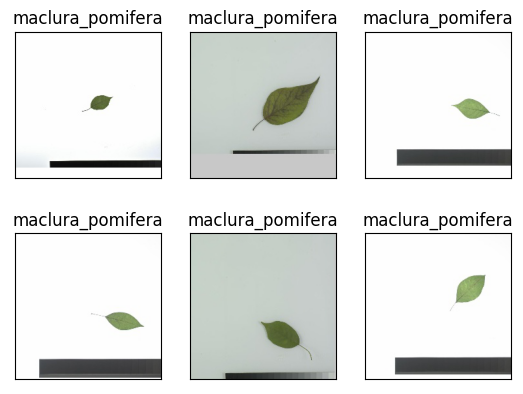

In [2]:
# 简单看一下数据
from modules.utils import show_imgs,MyImageDataset

nums = 6
example_dir = [os.path.join(data_dir,dir) for dir in train_data['image'][:nums]]
titles = list(train_data['label'][:nums])
show_imgs(num_cols=3,dirs= example_dir,titles = titles)

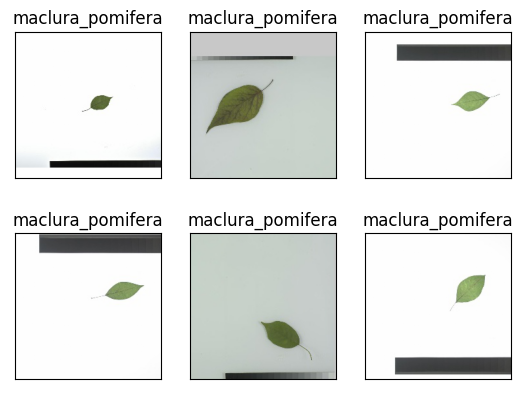

In [4]:
transform = transforms.Compose([
            transforms.Resize((224, 224)),
            # 数据增强：随机水平翻转，概率为0.5
            transforms.RandomHorizontalFlip(p=0.5),               
            # 数据增强：随机垂直翻转，概率为0.5
            transforms.RandomVerticalFlip(p=0.5),
            transforms.ToTensor(),
])
train_dataset = MyImageDataset(data_dir,list(train_data['image']),list(train_data['label']),transform=transform)

examples = []
titles = []
for i in range(6):
    img,label = train_dataset[i]
    examples.append(img)
    titles.append(label)
show_imgs(num_cols= 3,imgs=examples,titles = titles)

